In [35]:
# EDA: Анализ дорожно-транспортных происшествий

# Импорт библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Настройка отображения
pd.set_option('display.max_columns', None)
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 12

## 1. Загрузка и обзор данных

Первым шагом загрузим обработанные данные из Parquet файла, который был создан в результате ETL процесса.

In [36]:
# Загрузка обработанных данных
print("Загрузка данных...")
df = pd.read_parquet('../data/processed/accidents.parquet')

print(f"Размер датасета: {df.shape[0]:,} строк, {df.shape[1]} колонок")

# Общая информация о данных
print("\nИнформация о данных:")
print(df.info())

# Первые несколько строк
print("\nПервые 5 записей:")
display(df.head())

Загрузка данных...
Размер датасета: 7,728,394 строк, 51 колонок

Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7728394 entries, 0 to 7728393
Data columns (total 51 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   ID                     object        
 1   Source                 object        
 2   Severity               int64         
 3   Start_Time             datetime64[ns]
 4   End_Time               datetime64[ns]
 5   Start_Lat              float64       
 6   Start_Lng              float64       
 7   End_Lat                float64       
 8   End_Lng                float64       
 9   Distance(mi)           float64       
 10  Description            object        
 11  Street                 object        
 12  City                   object        
 13  County                 object        
 14  State                  category      
 15  Zipcode                object        
 16  Country               

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,Street,City,County,State,Zipcode,Country,Timezone,Airport_Code,Weather_Timestamp,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),Weather_Condition,Amenity,Bump,Crossing,Give_Way,Junction,No_Exit,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,Start_Year,Start_Month,Start_Day,Start_Hour,Start_Weekday
0,A-1,Source2,3,2016-02-08 05:46:00,2016-02-08 11:00:00,39.865147,-84.058723,NaN,NaN,0.01,Right lane blocked due to accident on I-70 Eas...,I-70 E,Dayton,Montgomery,OH,45424,US,US/Eastern,KFFO,2016-02-08 05:58:00,36.9,NaN,91.0,29.68,10.0,Calm,NaN,0.02,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Night,2016.0,2.0,8.0,5.0,0.0
1,A-2,Source2,2,2016-02-08 06:07:59,2016-02-08 06:37:59,39.928059,-82.831184,NaN,NaN,0.01,Accident on Brice Rd at Tussing Rd. Expect del...,Brice Rd,Reynoldsburg,Franklin,OH,43068-3402,US,US/Eastern,KCMH,2016-02-08 05:51:00,37.9,NaN,100.0,29.65,10.0,Calm,NaN,0.00,Light Rain,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Night,Night,Day,2016.0,2.0,8.0,6.0,0.0
2,A-3,Source2,2,2016-02-08 06:49:27,2016-02-08 07:19:27,39.063148,-84.032608,NaN,NaN,0.01,Accident on OH-32 State Route 32 Westbound at ...,State Route 32,Williamsburg,Clermont,OH,45176,US,US/Eastern,KI69,2016-02-08 06:56:00,36.0,33.3,100.0,29.67,10.0,SW,3.5,NaN,Overcast,False,False,False,False,False,False,False,False,False,False,False,True,False,Night,Night,Day,Day,2016.0,2.0,8.0,6.0,0.0
3,A-4,Source2,3,2016-02-08 07:23:34,2016-02-08 07:53:34,39.747753,-84.205582,NaN,NaN,0.01,Accident on I-75 Southbound at Exits 52 52B US...,I-75 S,Dayton,Montgomery,OH,45417,US,US/Eastern,KDAY,2016-02-08 07:38:00,35.1,31.0,96.0,29.64,9.0,SW,4.6,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,False,False,Night,Day,Day,Day,2016.0,2.0,8.0,7.0,0.0
4,A-5,Source2,2,2016-02-08 07:39:07,2016-02-08 08:09:07,39.627781,-84.188354,NaN,NaN,0.01,Accident on McEwen Rd at OH-725 Miamisburg Cen...,Miamisburg Centerville Rd,Dayton,Montgomery,OH,45459,US,US/Eastern,KMGY,2016-02-08 07:53:00,36.0,33.3,89.0,29.65,6.0,SW,3.5,NaN,Mostly Cloudy,False,False,False,False,False,False,False,False,False,False,False,True,False,Day,Day,Day,Day,2016.0,2.0,8.0,7.0,0.0


## 2. Метрика качества: Completeness (Полнота данных)

Оценим, насколько полно заполнены данные в каждой колонке. Это важная метрика для понимания качества данных.

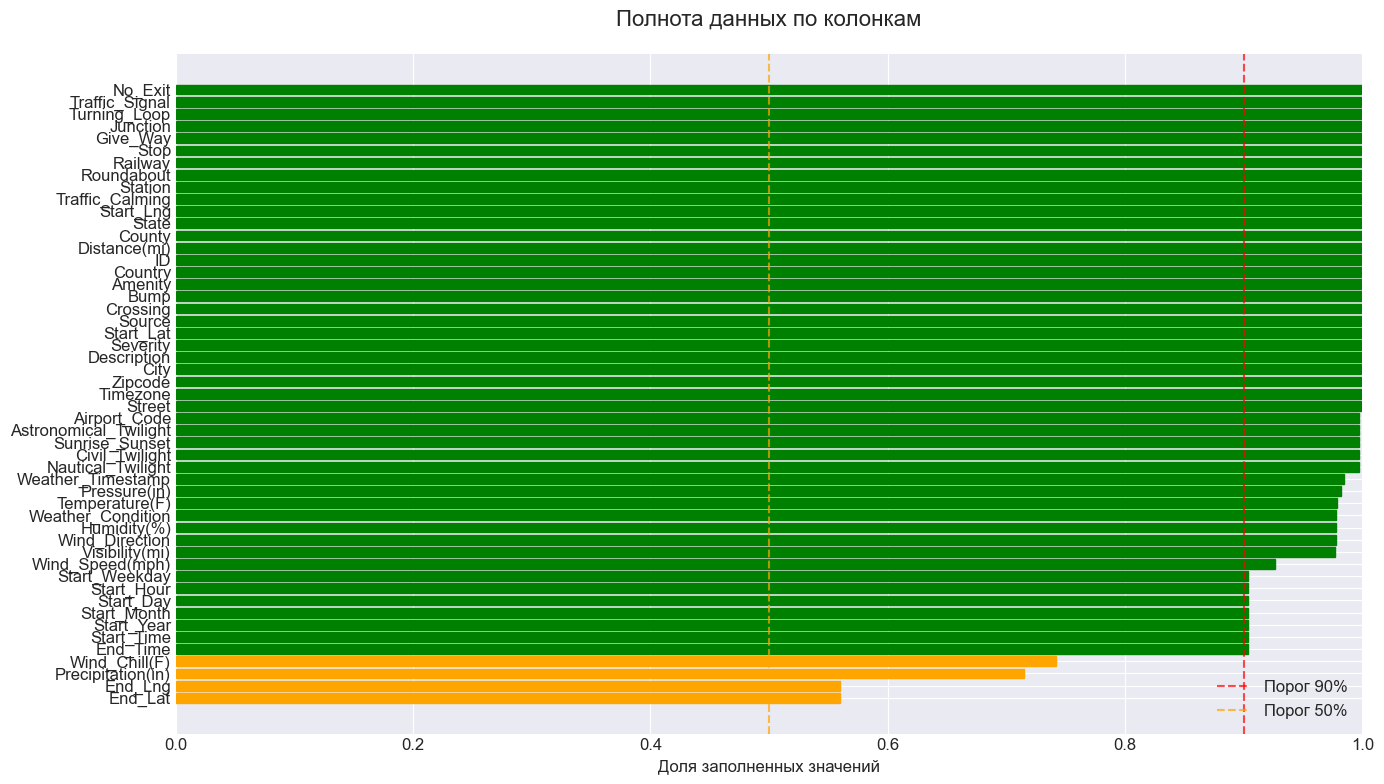

Средняя полнота данных: 95.4%
Колонок с полнотой >90%: 47
Колонок с полнотой <50%: 0


In [37]:
# Расчет полноты данных по колонкам
completeness = (1 - df.isnull().mean()).sort_values()
completeness_df = pd.DataFrame({
    'Колонка': completeness.index,
    'Полнота': completeness.values
})

# Визуализация полноты
plt.figure(figsize=(14, 8))
bars = plt.barh(completeness_df['Колонка'], completeness_df['Полнота'])
plt.axvline(x=0.9, color='red', linestyle='--', alpha=0.7, label='Порог 90%')
plt.axvline(x=0.5, color='orange', linestyle='--', alpha=0.7, label='Порог 50%')

# Раскраска столбцов
for bar, val in zip(bars, completeness_df['Полнота']):
    if val >= 0.9:
        bar.set_color('green')
    elif val >= 0.5:
        bar.set_color('orange')
    else:
        bar.set_color('red')

plt.title('Полнота данных по колонкам', fontsize=16, pad=20)
plt.xlabel('Доля заполненных значений', fontsize=12)
plt.xlim(0, 1)
plt.legend()
plt.tight_layout()
plt.show()

# Статистика полноты
print(f"Средняя полнота данных: {completeness.mean():.1%}")
print(f"Колонок с полнотой >90%: {(completeness > 0.9).sum()}")
print(f"Колонок с полнотой <50%: {(completeness < 0.5).sum()}")

# Показываем проблемные колонки
if (completeness < 0.5).sum() > 0:
    print("\nКолонки с низкой полнотой (<50%):")
    for col, val in completeness[completeness < 0.5].items():
        print(f"   • {col}: {val:.1%}")

## 3. Метрика качества: Uniqueness (Уникальность)

Проверим уникальность записей и выявим возможные дубликаты.

In [38]:
# Расчет уникальности записей
unique_ratio = df.drop_duplicates().shape[0] / df.shape[0]
print(f"Уникальных строк: {df.drop_duplicates().shape[0]:,}")
print(f"Всего строк: {df.shape[0]:,}")
print(f"Коэффициент уникальности: {unique_ratio:.2%}")

# Проверка дубликатов по ID (если есть такая колонка)
if 'ID' in df.columns:
    duplicates = df['ID'].duplicated().sum()
    print(f"\nДубликатов по ID: {duplicates} ({duplicates/len(df):.1%})")

# Уникальность по ключевым колонкам
print("\nУникальных значений по ключевым колонкам:")
key_columns = ['Severity', 'State', 'City', 'Weather_Condition', 'Start_Hour']
for col in key_columns:
    if col in df.columns:
        unique_vals = df[col].nunique()
        unique_ratio_col = unique_vals / len(df)
        print(f"   • {col}: {unique_vals:,} уникальных значений ({unique_ratio_col:.1%})")

Уникальных строк: 7,728,394
Всего строк: 7,728,394
Коэффициент уникальности: 100.00%

Дубликатов по ID: 0 (0.0%)

Уникальных значений по ключевым колонкам:
   • Severity: 4 уникальных значений (0.0%)
   • State: 49 уникальных значений (0.0%)
   • City: 13,678 уникальных значений (0.2%)
   • Weather_Condition: 144 уникальных значений (0.0%)
   • Start_Hour: 24 уникальных значений (0.0%)


## 4. Метрика качества: Outlier Ratio (Выбросы)

Проанализируем наличие выбросов в числовых данных, что может указывать на ошибки в данных или реальные аномалии.

Числовых колонок для анализа: 18


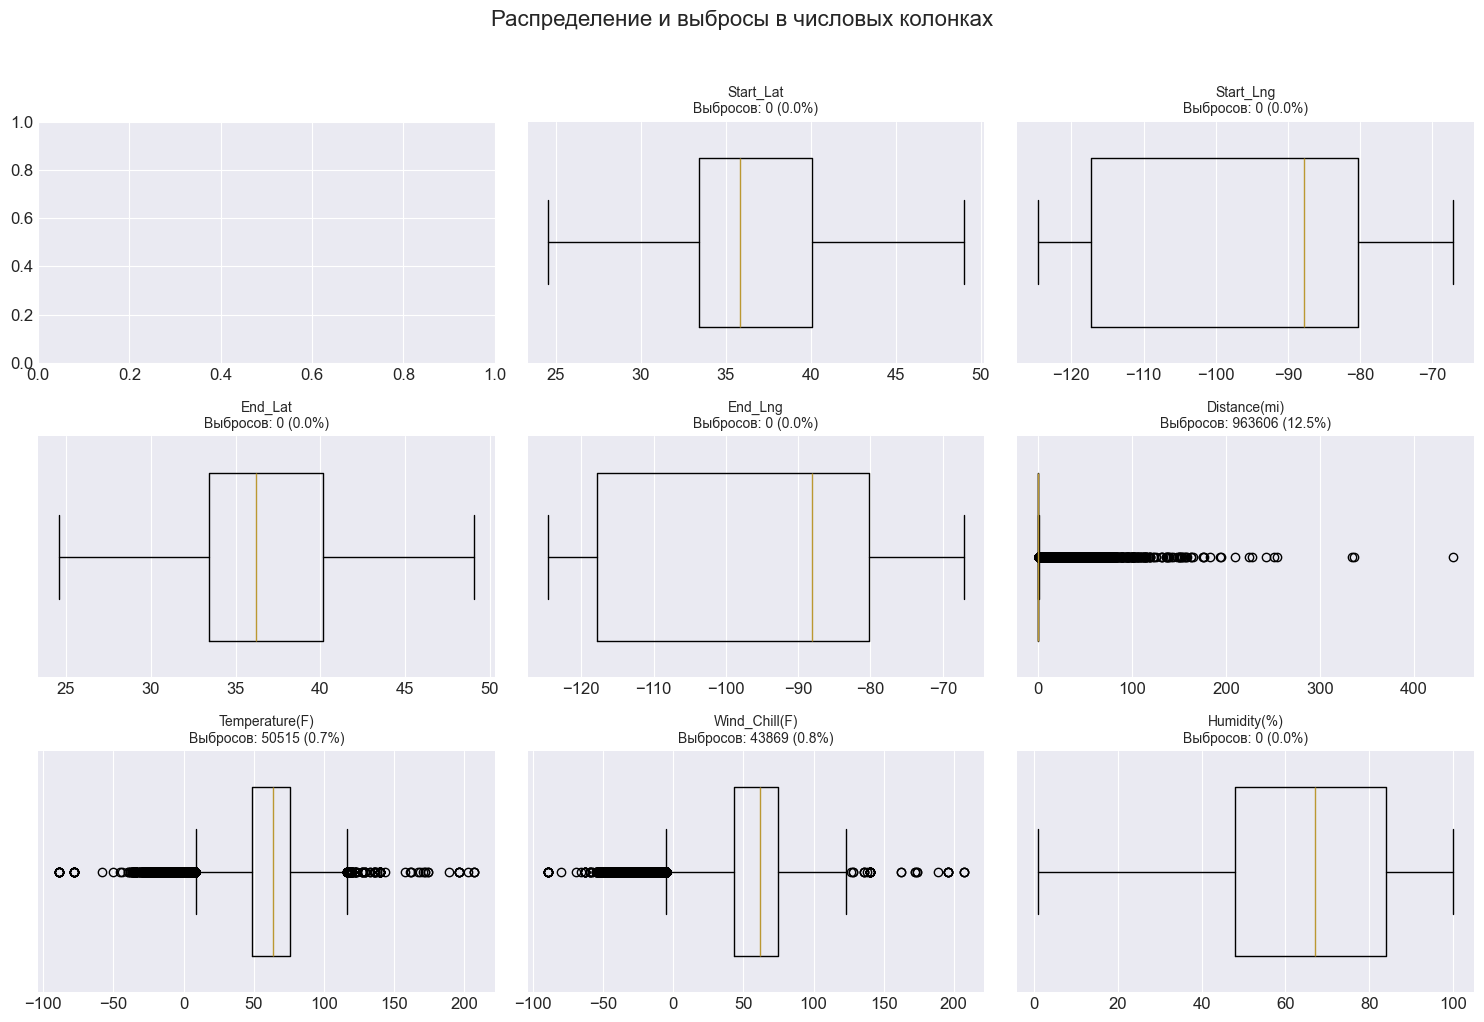


Сводка по выбросам:


,Колонка,Выбросы,Всего значений,Доля выбросов
4,Distance(mi),963606,7728394,0.124684
6,Wind_Chill(F),43869,5729375,0.007657
5,Temperature(F),50515,7564541,0.006678
0,Start_Lat,0,7728394,0.000000
3,End_Lng,0,4325632,0.000000
2,End_Lat,0,4325632,0.000000
1,Start_Lng,0,7728394,0.000000
7,Humidity(%),0,7554250,0.000000



ИТОГО:
   • Всего выбросов: 1,057,990
   • Всего числовых значений: 52,684,612
   • Общая доля выбросов: 2.01%

ТОП-3 колонки с выбросами:
   • Distance(mi): 963,606 выбросов (12.5%)
   • Temperature(F): 50,515 выбросов (0.7%)
   • Wind_Chill(F): 43,869 выбросов (0.8%)


In [39]:
# Выбираем числовые колонки для анализа
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print(f"Числовых колонок для анализа: {len(numeric_cols)}")

# Анализ выбросов для каждой числовой колонки
outliers_summary = []
total_outliers = 0
total_values = 0

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols[:9], 1):  # Анализируем первые 9 колонок
    plt.subplot(3, 3, i)
    
    # Удаляем пропущенные значения
    data = df[col].dropna()
    if len(data) == 0:
        continue
    
    # Расчет границ для выбросов (метод IQR)
    Q1 = data.quantile(0.25)
    Q3 = data.quantile(0.75)
    IQR = Q3 - Q1
    
    if IQR == 0:  # Если все значения одинаковые
        continue
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Подсчет выбросов
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    outlier_count = len(outliers)
    outlier_ratio = outlier_count / len(data)
    
    total_outliers += outlier_count
    total_values += len(data)
    
    outliers_summary.append({
        'Колонка': col,
        'Выбросы': outlier_count,
        'Всего значений': len(data),
        'Доля выбросов': outlier_ratio
    })
    
    # Boxplot для визуализации
    plt.boxplot(data, vert=False, widths=0.7)
    plt.title(f'{col}\nВыбросов: {outlier_count} ({outlier_ratio:.1%})', fontsize=10)
    plt.yticks([])

plt.suptitle('Распределение и выбросы в числовых колонках', fontsize=16, y=1.02)
plt.tight_layout()
plt.show()

# Сводная статистика по выбросам
if outliers_summary:
    outliers_df = pd.DataFrame(outliers_summary)
    print("\nСводка по выбросам:")
    display(outliers_df.sort_values('Доля выбросов', ascending=False))
    
    print(f"\nИТОГО:")
    print(f"   • Всего выбросов: {total_outliers:,}")
    print(f"   • Всего числовых значений: {total_values:,}")
    print(f"   • Общая доля выбросов: {total_outliers/total_values:.2%}")
    
    # Топ-3 колонки с наибольшим количеством выбросов
    top_outliers = outliers_df.nlargest(3, 'Выбросы')
    print(f"\nТОП-3 колонки с выбросами:")
    for idx, row in top_outliers.iterrows():
        print(f"   • {row['Колонка']}: {row['Выбросы']:,} выбросов ({row['Доля выбросов']:.1%})")

## 5. Анализ временных закономерностей

Изучим распределение ДТП по времени: часам, дням недели и месяцам.

Пиковый час аварийности: 7.0:00 (546,789 ДТП)
Самый аварийный день: Пт (1,237,229 ДТП)
Самый аварийный месяц: Дек (758,783 ДТП)


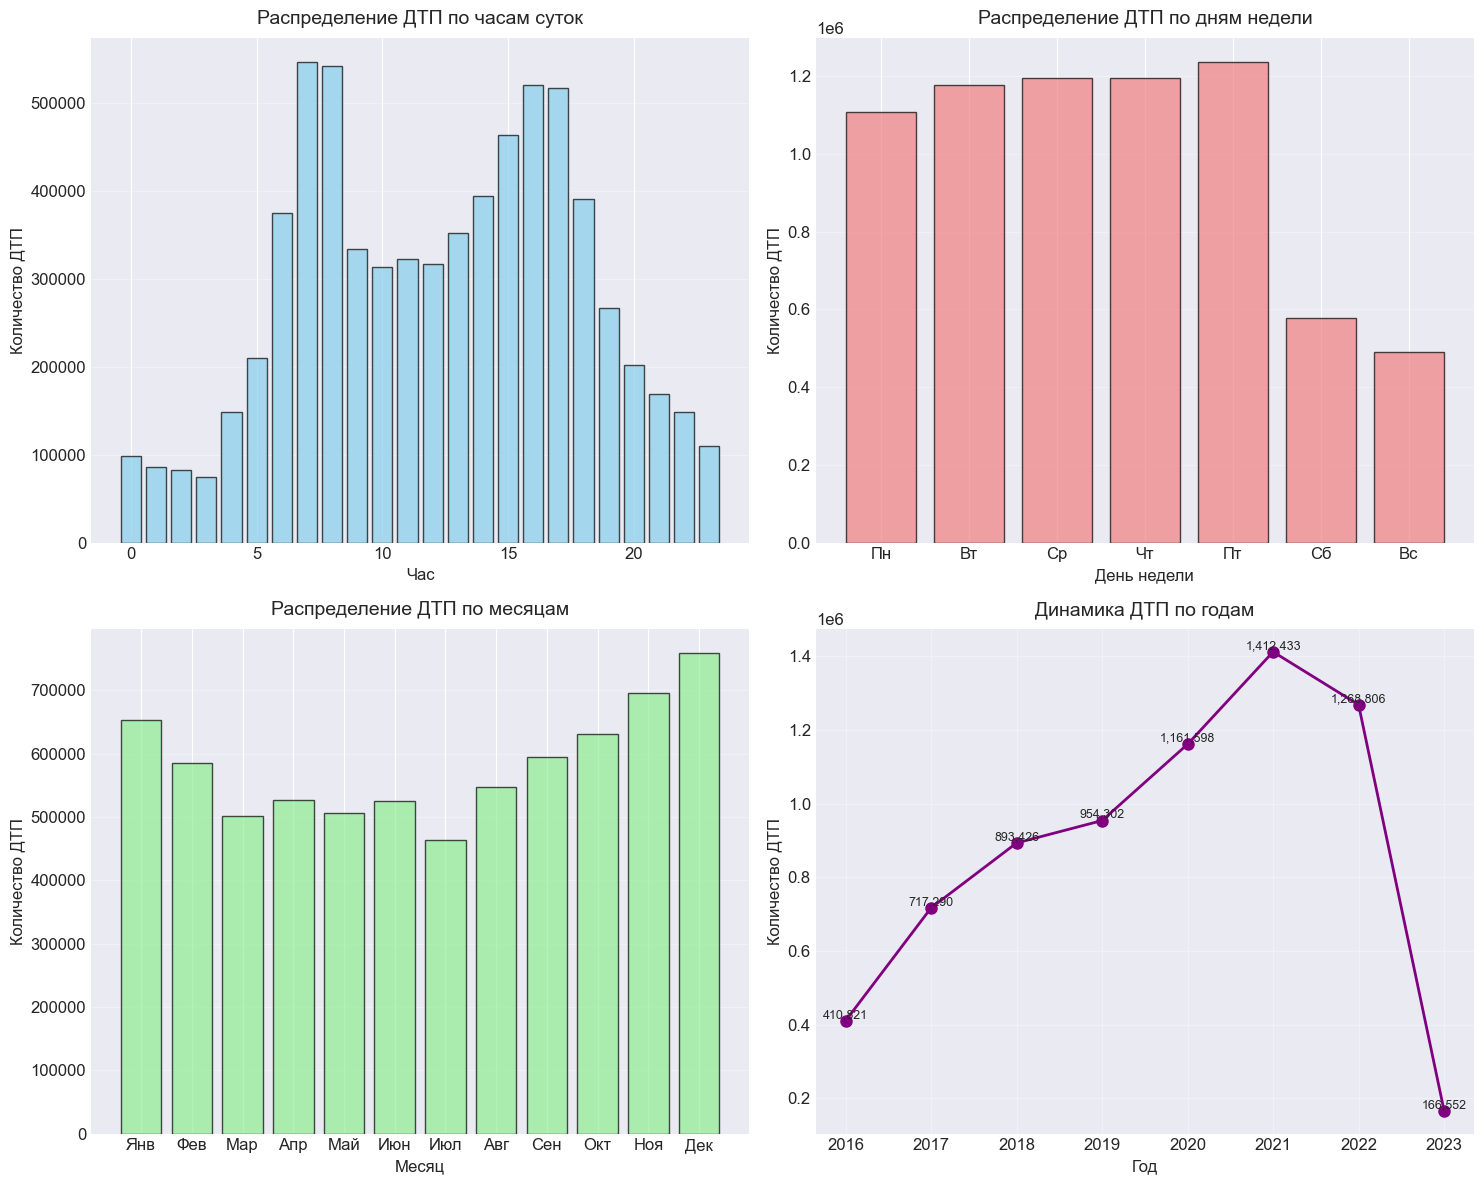

In [40]:
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Распределение по часам суток
if 'Start_Hour' in df.columns:
    hour_counts = df['Start_Hour'].value_counts().sort_index()
    axes[0,0].bar(hour_counts.index, hour_counts.values, color='skyblue', alpha=0.7, edgecolor='black')
    axes[0,0].set_title('Распределение ДТП по часам суток', fontsize=14, pad=10)
    axes[0,0].set_xlabel('Час', fontsize=12)
    axes[0,0].set_ylabel('Количество ДТП', fontsize=12)
    axes[0,0].grid(True, alpha=0.3, axis='y')
    
    # Находим пиковые часы
    peak_hour = hour_counts.idxmax()
    print(f"Пиковый час аварийности: {peak_hour}:00 ({hour_counts.max():,} ДТП)")

# 2. Распределение по дням недели
if 'Start_Weekday' in df.columns:
    weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
    weekday_counts = df['Start_Weekday'].value_counts().sort_index()
    
    axes[0,1].bar(weekday_names, weekday_counts.values, color='lightcoral', alpha=0.7, edgecolor='black')
    axes[0,1].set_title('Распределение ДТП по дням недели', fontsize=14, pad=10)
    axes[0,1].set_xlabel('День недели', fontsize=12)
    axes[0,1].set_ylabel('Количество ДТП', fontsize=12)
    axes[0,1].grid(True, alpha=0.3, axis='y')
    
    peak_day_idx = int(weekday_counts.idxmax())
    peak_day_name = weekday_names[peak_day_idx]
    print(f"Самый аварийный день: {peak_day_name} ({weekday_counts.max():,} ДТП)")

# 3. Распределение по месяцам
if 'Start_Month' in df.columns:
    month_names = ['Янв', 'Фев', 'Мар', 'Апр', 'Май', 'Июн', 
                   'Июл', 'Авг', 'Сен', 'Окт', 'Ноя', 'Дек']
    month_counts = df['Start_Month'].value_counts().sort_index()
    
    axes[1,0].bar(month_names, month_counts.values, color='lightgreen', alpha=0.7, edgecolor='black')
    axes[1,0].set_title('Распределение ДТП по месяцам', fontsize=14, pad=10)
    axes[1,0].set_xlabel('Месяц', fontsize=12)
    axes[1,0].set_ylabel('Количество ДТП', fontsize=12)
    axes[1,0].grid(True, alpha=0.3, axis='y')
    
    peak_month_idx = int(month_counts.idxmax() - 1)
    peak_month_name = month_names[peak_month_idx]
    print(f"Самый аварийный месяц: {peak_month_name} ({month_counts.max():,} ДТП)")

# 4. Распределение по годам
if 'Start_Year' in df.columns:
    year_counts = df['Start_Year'].value_counts().sort_index()
    axes[1,1].plot(year_counts.index, year_counts.values, marker='o', 
                   color='purple', linewidth=2, markersize=8)
    axes[1,1].set_title('Динамика ДТП по годам', fontsize=14, pad=10)
    axes[1,1].set_xlabel('Год', fontsize=12)
    axes[1,1].set_ylabel('Количество ДТП', fontsize=12)
    axes[1,1].grid(True, alpha=0.3)
    
    # Добавляем значения над точками
    for year, count in zip(year_counts.index, year_counts.values):
        axes[1,1].text(year, count, f'{count:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

## 6. Анализ тяжести аварий

Изучим распределение аварий по уровню тяжести и как тяжесть связана с другими факторами.

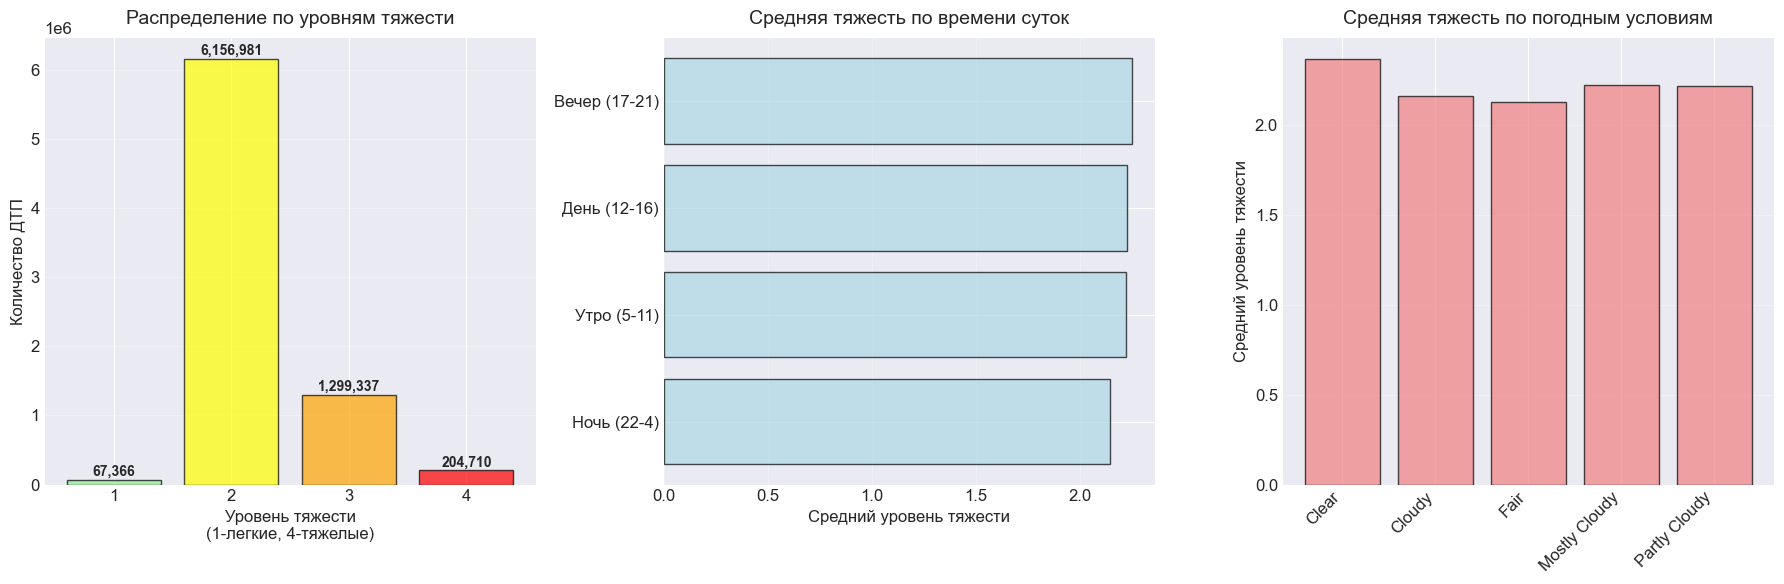


Статистика по тяжести аварий:
   • Средняя тяжесть: 2.21
   • Медианная тяжесть: 2
   • Легкие аварии (уровень 1-2): 6,224,347 (80.5%)
   • Тяжелые аварии (уровень 3-4): 1,504,047 (19.5%)


In [41]:
if 'Severity' in df.columns:
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    
    # 1. Распределение по уровням тяжести
    severity_counts = df['Severity'].value_counts().sort_index()
    colors = ['lightgreen', 'yellow', 'orange', 'red']
    
    axes[0].bar(severity_counts.index.astype(str), severity_counts.values, 
                color=colors, alpha=0.7, edgecolor='black', linewidth=1)
    axes[0].set_title('Распределение по уровням тяжести', fontsize=14, pad=10)
    axes[0].set_xlabel('Уровень тяжести\n(1-легкие, 4-тяжелые)', fontsize=12)
    axes[0].set_ylabel('Количество ДТП', fontsize=12)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Добавляем значения над столбцами
    for i, v in enumerate(severity_counts.values):
        axes[0].text(i, v + max(severity_counts.values)*0.01, 
                    f'{v:,}', ha='center', fontweight='bold', fontsize=10)
    
    # 2. Тяжесть по времени суток
    if 'Start_Hour' in df.columns:
        # Создаем категории времени суток
        def time_category(hour):
            if 5 <= hour < 12:
                return 'Утро (5-11)'
            elif 12 <= hour < 17:
                return 'День (12-16)'
            elif 17 <= hour < 22:
                return 'Вечер (17-21)'
            else:
                return 'Ночь (22-4)'
        
        df['Time_Category'] = df['Start_Hour'].apply(time_category)
        severity_by_time = df.groupby('Time_Category')['Severity'].mean().sort_values()
        
        axes[1].barh(range(len(severity_by_time)), severity_by_time.values, 
                    color='lightblue', alpha=0.7, edgecolor='black')
        axes[1].set_yticks(range(len(severity_by_time)))
        axes[1].set_yticklabels(severity_by_time.index)
        axes[1].set_title('Средняя тяжесть по времени суток', fontsize=14, pad=10)
        axes[1].set_xlabel('Средний уровень тяжести', fontsize=12)
        axes[1].grid(True, alpha=0.3, axis='x')
    
    # 3. Тяжесть по погодным условиям
    if 'Weather_Condition' in df.columns:
        # Берем топ-5 погодных условий
        top_weather = df['Weather_Condition'].value_counts().head(5).index
        weather_severity = df[df['Weather_Condition'].isin(top_weather)].groupby('Weather_Condition')['Severity'].mean()
        
        axes[2].bar(range(len(weather_severity)), weather_severity.values, 
                   color='lightcoral', alpha=0.7, edgecolor='black')
        axes[2].set_xticks(range(len(weather_severity)))
        axes[2].set_xticklabels(weather_severity.index, rotation=45, ha='right')
        axes[2].set_title('Средняя тяжесть по погодным условиям', fontsize=14, pad=10)
        axes[2].set_ylabel('Средний уровень тяжести', fontsize=12)
        axes[2].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика по тяжести
    print(f"\nСтатистика по тяжести аварий:")
    print(f"   • Средняя тяжесть: {df['Severity'].mean():.2f}")
    print(f"   • Медианная тяжесть: {df['Severity'].median():.0f}")
    print(f"   • Легкие аварии (уровень 1-2): {(df['Severity'] <= 2).sum():,} ({(df['Severity'] <= 2).sum()/len(df):.1%})")
    print(f"   • Тяжелые аварии (уровень 3-4): {(df['Severity'] >= 3).sum():,} ({(df['Severity'] >= 3).sum()/len(df):.1%})")

## 7. Географический анализ

Проанализируем распределение ДТП по штатам и городам.

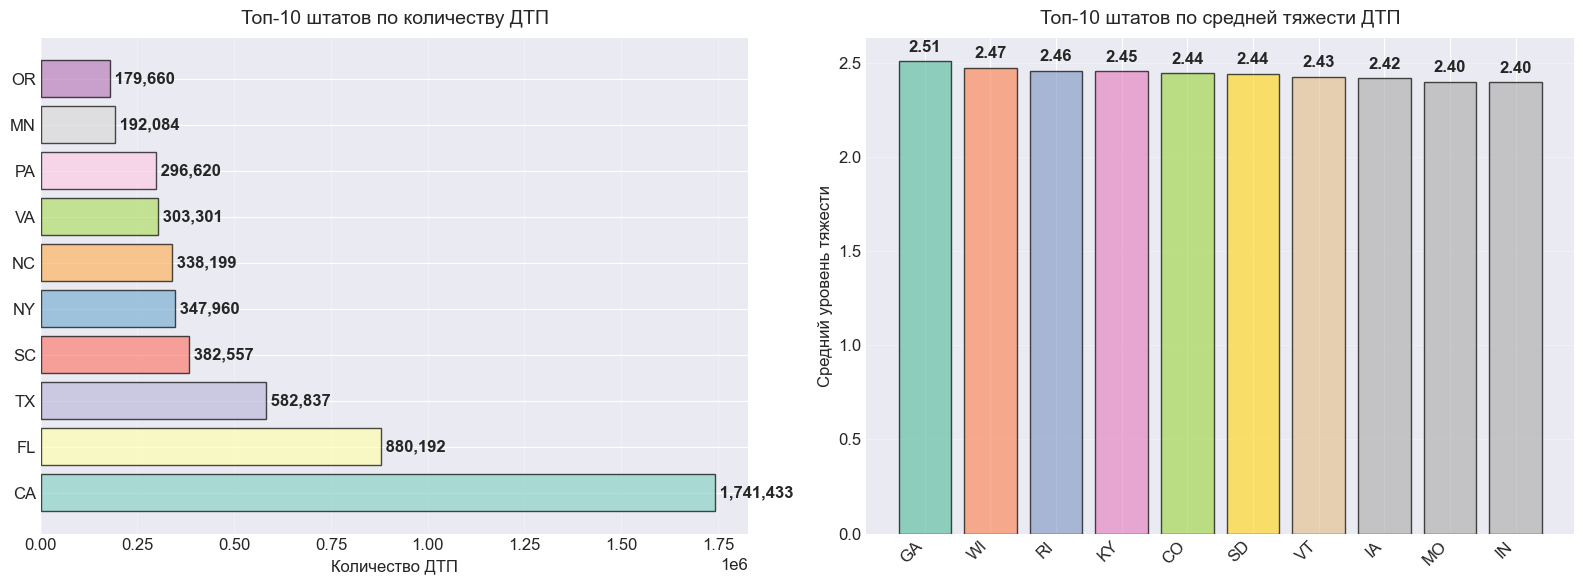


Географическая статистика:
   • Всего штатов: 49
   • Самый аварийный штат: CA (1,741,433 ДТП)
   • Штат с самыми тяжелыми авариями: GA (тяжесть: 2.51)
   • Топ-5 городов по ДТП: Miami, Houston, Los Angeles, Charlotte, Dallas


In [42]:
if 'State' in df.columns:
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # 1. Топ-10 штатов по количеству ДТП
    top_states = df['State'].value_counts().head(10)
    colors = plt.cm.Set3(range(len(top_states)))
    
    axes[0].barh(range(len(top_states)), top_states.values, color=colors, alpha=0.7, edgecolor='black')
    axes[0].set_yticks(range(len(top_states)))
    axes[0].set_yticklabels(top_states.index)
    axes[0].set_title('Топ-10 штатов по количеству ДТП', fontsize=14, pad=10)
    axes[0].set_xlabel('Количество ДТП', fontsize=12)
    axes[0].grid(True, alpha=0.3, axis='x')
    
    # Добавляем значения
    for i, v in enumerate(top_states.values):
        axes[0].text(v, i, f' {v:,}', va='center', fontweight='bold')
    
    # 2. Топ-10 штатов по тяжести аварий
    state_severity = df.groupby('State')['Severity'].mean().sort_values(ascending=False).head(10)
    
    axes[1].bar(range(len(state_severity)), state_severity.values, 
               color=plt.cm.Set2(range(len(state_severity))), alpha=0.7, edgecolor='black')
    axes[1].set_xticks(range(len(state_severity)))
    axes[1].set_xticklabels(state_severity.index, rotation=45, ha='right')
    axes[1].set_title('Топ-10 штатов по средней тяжести ДТП', fontsize=14, pad=10)
    axes[1].set_ylabel('Средний уровень тяжести', fontsize=12)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    # Добавляем значения
    for i, v in enumerate(state_severity.values):
        axes[1].text(i, v + 0.05, f'{v:.2f}', ha='center', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Статистика
    print(f"\nГеографическая статистика:")
    print(f"   • Всего штатов: {df['State'].nunique()}")
    print(f"   • Самый аварийный штат: {top_states.index[0]} ({top_states.values[0]:,} ДТП)")
    print(f"   • Штат с самыми тяжелыми авариями: {state_severity.index[0]} (тяжесть: {state_severity.values[0]:.2f})")
    
    # Анализ городов (если есть данные)
    if 'City' in df.columns:
        top_cities = df['City'].value_counts().head(5)
        print(f"   • Топ-5 городов по ДТП: {', '.join(top_cities.index.tolist())}")

## 8. Анализ погодных условий

Исследуем влияние погодных условий на частоту и тяжесть ДТП.

Самые частые условия: Fair (2,560,802 ДТП)


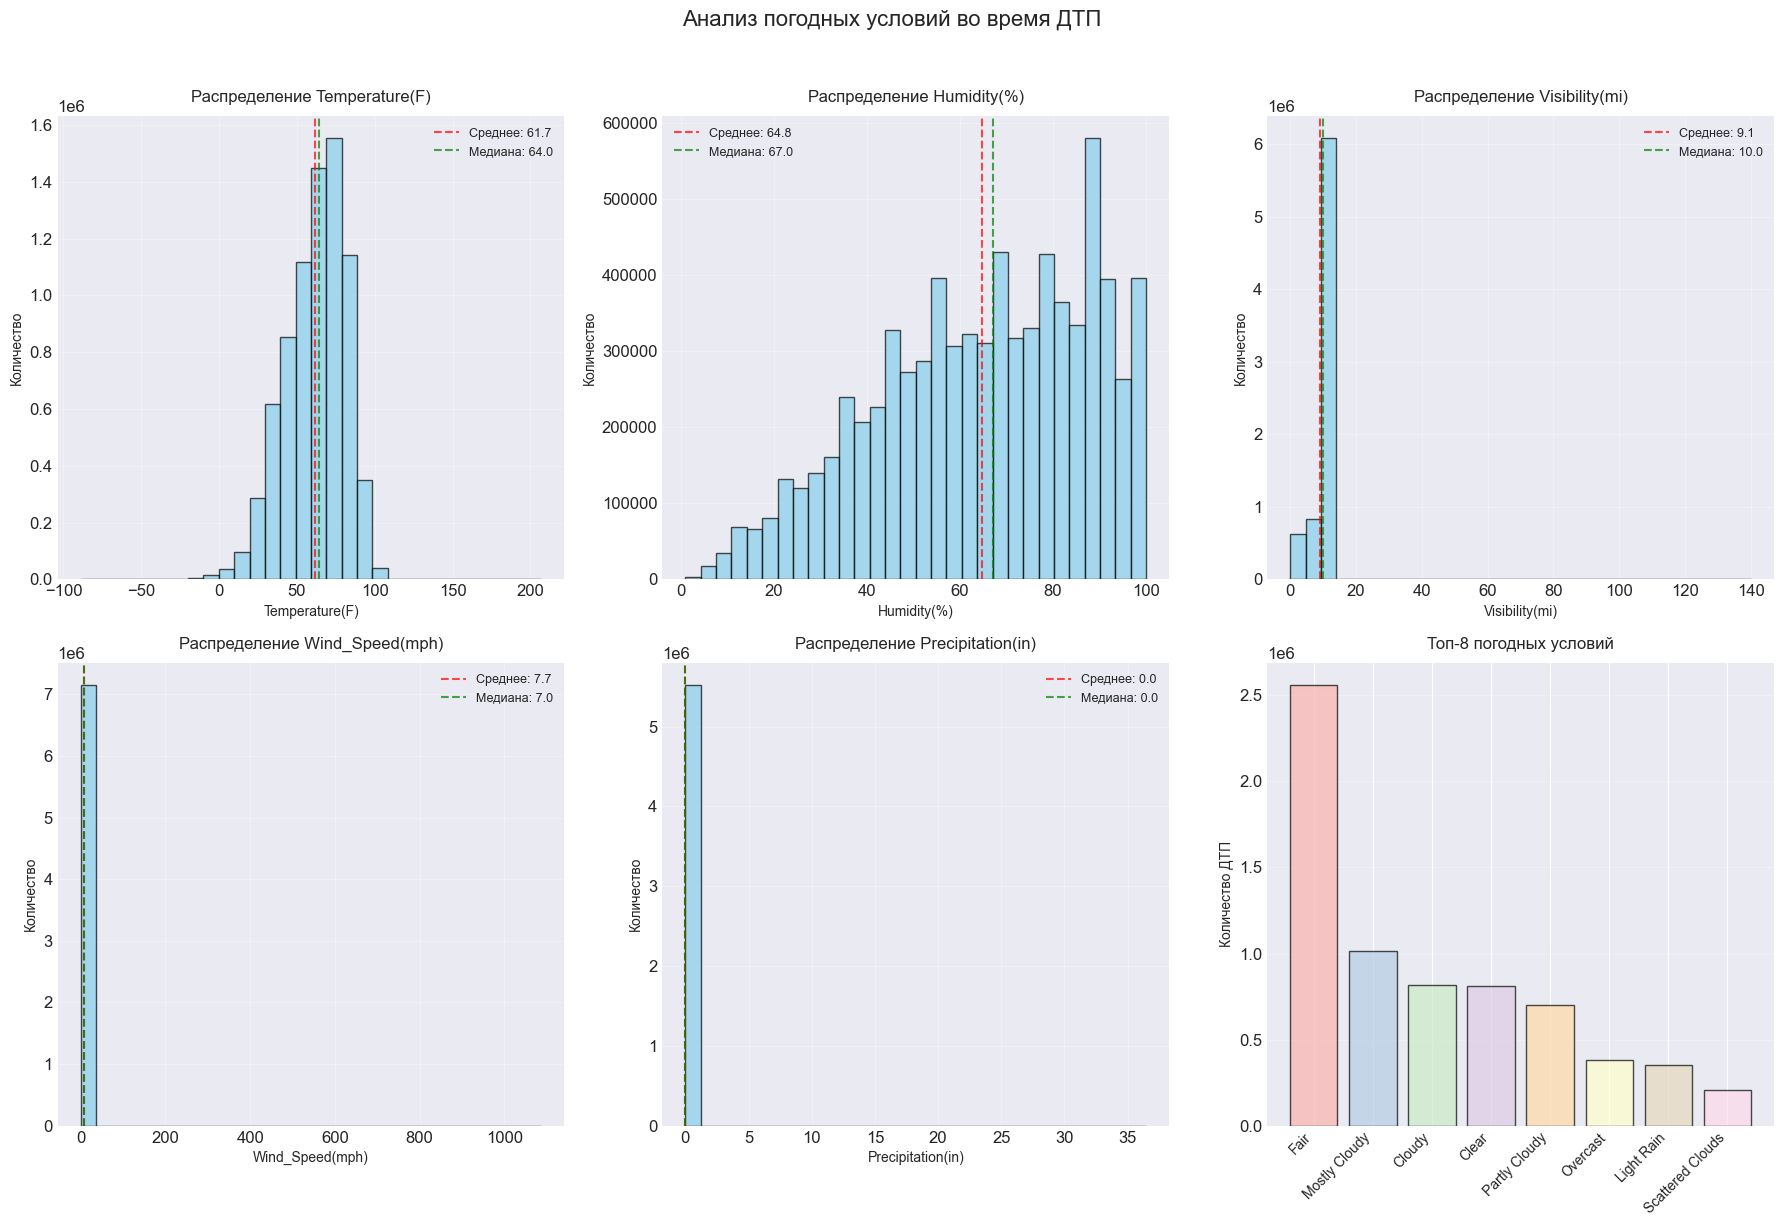


Корреляция тяжести с погодными условиями:
   • Temperature(F): -0.020 (слабая)
   • Humidity(%): 0.022 (слабая)
   • Visibility(mi): -0.003 (слабая)
   • Wind_Speed(mph): 0.040 (слабая)
   • Precipitation(in): 0.021 (слабая)


In [43]:
weather_cols = ['Temperature(F)', 'Humidity(%)', 'Visibility(mi)', 
                'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition']

if any(col in df.columns for col in weather_cols):
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.flatten()
    
    for i, col in enumerate(weather_cols):
        if col in df.columns and i < len(axes):
            if col == 'Weather_Condition':
                # Топ-8 погодных условий
                top_weather = df[col].value_counts().head(8)
                axes[i].bar(range(len(top_weather)), top_weather.values, 
                           color=plt.cm.Pastel1(range(len(top_weather))), alpha=0.7, edgecolor='black')
                axes[i].set_xticks(range(len(top_weather)))
                axes[i].set_xticklabels(top_weather.index, rotation=45, ha='right', fontsize=10)
                axes[i].set_title(f'Топ-8 погодных условий', fontsize=12, pad=10)
                axes[i].set_ylabel('Количество ДТП', fontsize=10)
                axes[i].grid(True, alpha=0.3, axis='y')
                
                print(f"Самые частые условия: {top_weather.index[0]} ({top_weather.values[0]:,} ДТП)")
                
            else:
                # Гистограмма для числовых параметров
                data = df[col].dropna()
                if len(data) > 0:
                    axes[i].hist(data, bins=30, color='skyblue', alpha=0.7, edgecolor='black')
                    axes[i].set_title(f'Распределение {col}', fontsize=12, pad=10)
                    axes[i].set_xlabel(col, fontsize=10)
                    axes[i].set_ylabel('Количество', fontsize=10)
                    axes[i].grid(True, alpha=0.3)
                    
                    # Статистика
                    mean_val = data.mean()
                    median_val = data.median()
                    axes[i].axvline(mean_val, color='red', linestyle='--', alpha=0.7, 
                                   label=f'Среднее: {mean_val:.1f}')
                    axes[i].axvline(median_val, color='green', linestyle='--', alpha=0.7, 
                                   label=f'Медиана: {median_val:.1f}')
                    axes[i].legend(fontsize=9)
    
    # Убираем лишние оси
    for j in range(i+1, len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('Анализ погодных условий во время ДТП', fontsize=16, y=1.02)
    plt.tight_layout()
    plt.show()
    
    # Корреляция погодных условий с тяжестью аварий
    if 'Severity' in df.columns:
        numeric_weather = [col for col in weather_cols if col in df.columns and col != 'Weather_Condition']
        if numeric_weather:
            # Рассчитываем корреляции
            correlations = df[numeric_weather + ['Severity']].corr()['Severity'].drop('Severity')
            
            print(f"\nКорреляция тяжести с погодными условиями:")
            for col, corr in correlations.items():
                if abs(corr) > 0.1:
                    strength = "сильная" if abs(corr) > 0.3 else "умеренная"
                    print(f"   • {col}: {corr:.3f} ({strength})")
                else:
                    print(f"   • {col}: {corr:.3f} (слабая)")

## 9. Итоговые выводы и рекомендации

На основе проведенного анализа формулируем ключевые выводы и практические рекомендации.

In [45]:
print("\nКАЧЕСТВО ДАННЫХ:")
print(f"  1. Полнота данных: {completeness.mean():.1%} - {'ХОРОШО' if completeness.mean() > 0.7 else 'ТРЕБУЕТ ДОРАБОТКИ'}")
print(f"  2. Уникальность записей: {unique_ratio:.1%} - {'ОТЛИЧНО' if unique_ratio > 0.95 else 'ЕСТЬ ДУБЛИКАТЫ'}")
print(f"  3. Доля выбросов: {total_outliers/total_values:.1%} - {'НОРМА' if total_outliers/total_values < 0.1 else 'МНОГО ВЫБРОСОВ'}")

print("\nКЛЮЧЕВЫЕ ИНСАЙТЫ:")

# Анализ времени
if 'Start_Hour' in df.columns:
    peak_hour = df['Start_Hour'].value_counts().idxmax()
    hour_count = df['Start_Hour'].value_counts().max()
    print(f"  • Пик аварийности: {peak_hour}:00 ({hour_count:,} ДТП)")

if 'Start_Weekday' in df.columns:
    weekday_names = ['Пн', 'Вт', 'Ср', 'Чт', 'Пт', 'Сб', 'Вс']
    peak_day_idx = int(df['Start_Weekday'].value_counts().idxmax())
    print(f"  • Самый опасный день: {weekday_names[peak_day_idx]}")

# Анализ тяжести
if 'Severity' in df.columns:
    severe_percentage = (df['Severity'] >= 3).sum() / len(df) * 100
    print(f"  • Тяжелые аварии: {severe_percentage:.1f}% от общего числа")

# Анализ географии
if 'State' in df.columns:
    top_state = df['State'].value_counts().index[0]
    top_state_count = df['State'].value_counts().max()
    print(f"  • Самый аварийный штат: {top_state} ({top_state_count:,} ДТП)")

print("\nРЕКОМЕНДАЦИИ ДЛЯ ПОВЫШЕНИЯ БЕЗОПАСНОСТИ:")
print("  1. Усилить патрулирование в пиковые часы и дни недели")
print("  2. Улучшить освещение дорог в вечернее и ночное время")
print("  3. Проводить профилактические мероприятия в опасных погодных условиях")
print("  4. Сконцентрировать ресурсы в самых аварийных регионах")
print("  5. Разработать систему предупреждения водителей об опасных участках")


КАЧЕСТВО ДАННЫХ:
  1. Полнота данных: 95.4% - ХОРОШО
  2. Уникальность записей: 100.0% - ОТЛИЧНО
  3. Доля выбросов: 2.0% - НОРМА

КЛЮЧЕВЫЕ ИНСАЙТЫ:
  • Пик аварийности: 7.0:00 (546,789 ДТП)
  • Самый опасный день: Пт
  • Тяжелые аварии: 19.5% от общего числа
  • Самый аварийный штат: CA (1,741,433 ДТП)

РЕКОМЕНДАЦИИ ДЛЯ ПОВЫШЕНИЯ БЕЗОПАСНОСТИ:
  1. Усилить патрулирование в пиковые часы и дни недели
  2. Улучшить освещение дорог в вечернее и ночное время
  3. Проводить профилактические мероприятия в опасных погодных условиях
  4. Сконцентрировать ресурсы в самых аварийных регионах
  5. Разработать систему предупреждения водителей об опасных участках
